<h1> Predicting Employee Attrition Using Classification </h1>

## Introduction

Employee attrition presents a critical challenge for organizations, impacting productivity, team morale, and operational stability while driving up recruitment and training costs. Understanding the reasons behind employee turnover and predicting which employees are likely to leave can help organizations implement proactive strategies to retain talent and maintain workforce efficiency.

## Dataset


This project shows employee attrition using machine learning techniques applied to the IBM HR Analytics Attrition Dataset.

The dataset was downloaded directly using the Kaggle dataset link

[`pavansubhasht/ibm-hr-analytics-attrition-dataset`](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).

Key features such as, job role, distance from home, monthly income, and job satisfaction are analyzed to predict attrition and identify its driving factors.


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the dataset
print("\nPreview of the dataset:")
print(df.head())


Preview of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  S

## Data Preprocessing and EDA

EDA offering valuable insights into the dataset's structure and key patterns.

1. Target Variable Analysis: <br>
The target variable Attrition is analyzed, showing the distribution of employees who stayed (No) and those who left (Yes). <br>
A count plot illustrates the imbalance in attrition cases, with a majority of employees staying.

2. Feature Distribution: <br>
The age distribution is visualized using a histogram to identify patterns in employee demographics. <br>
Attrition by job role is explored, revealing which job roles have higher attrition rates.

3. Correlation Analysis: <br>
A correlation heatmap is generated to highlight relationships among numerical features, such as MonthlyIncome and DistanceFromHome. <br>
This helps identify features that may influence attrition predictions.

Dataset has 1470 rows and 35 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null 

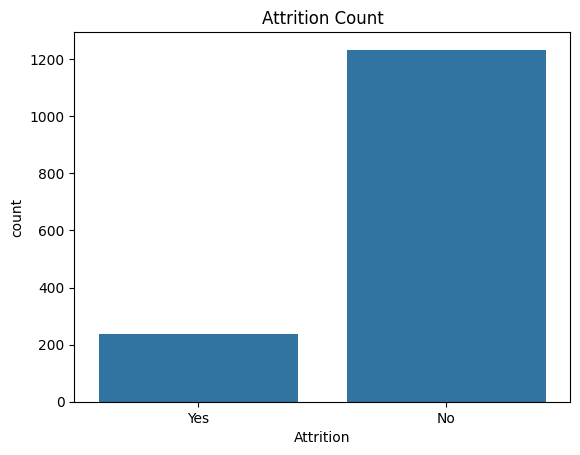

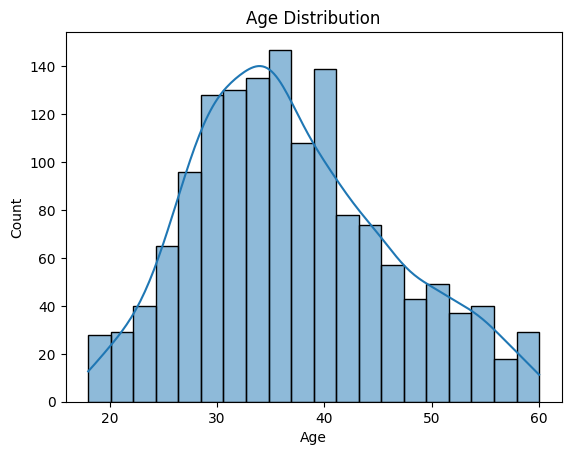

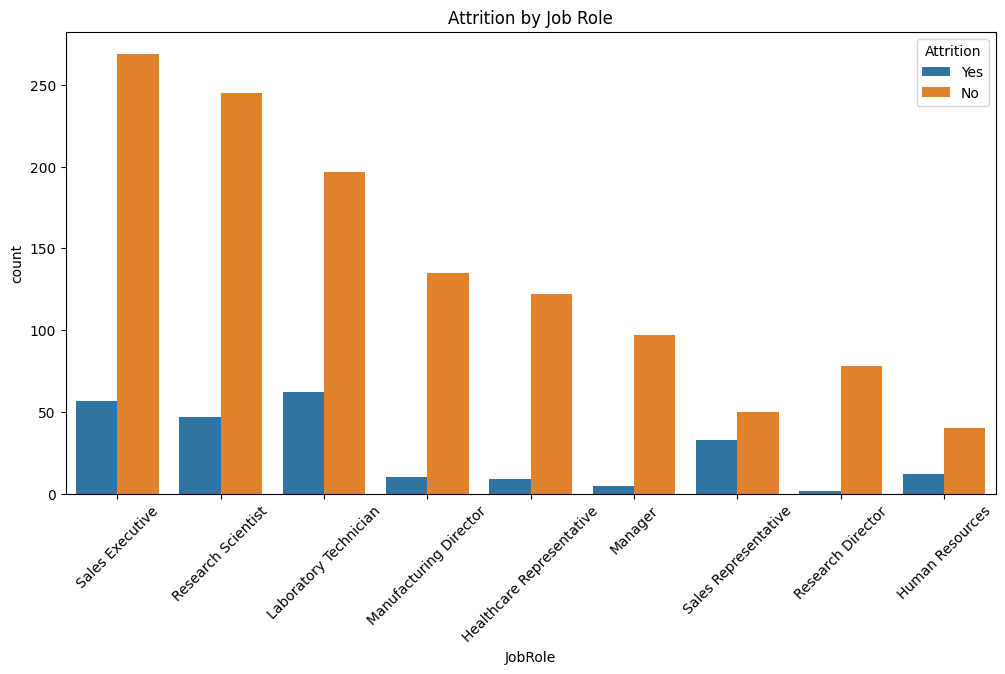

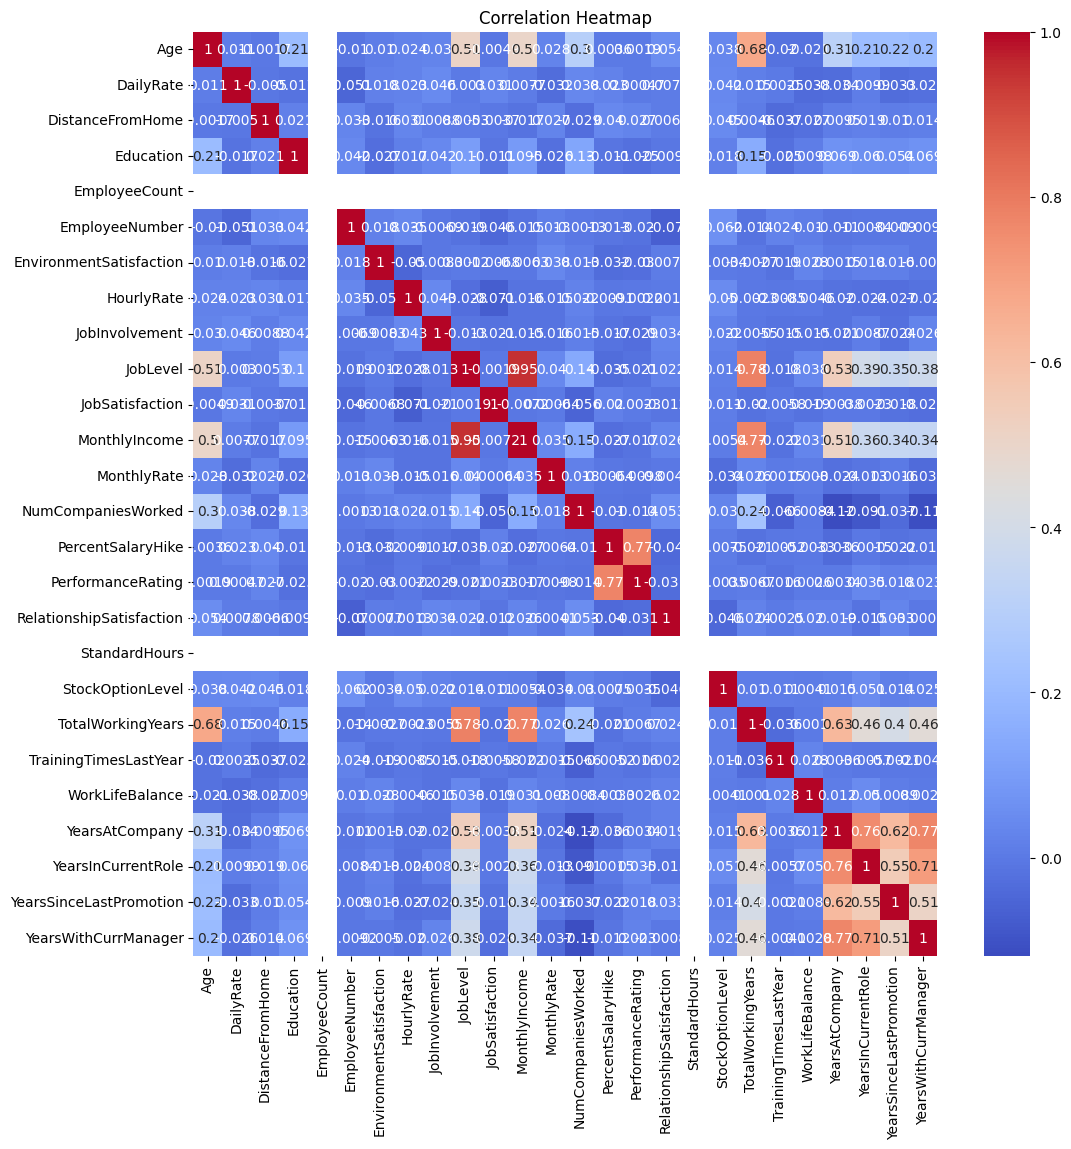

In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Summary
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()
print("\n")

df.describe()
print("\n")

# Checking Missing Values
print("Missing values in each column:")
print(df.isnull().sum(), "\n")

# Target Variable Distribution
print(df['Attrition'].value_counts(), "\n")  # Count occurrences of each class in the target variable

# Display target variable distribution as percentages
print(df['Attrition'].value_counts(normalize=True) * 100, "\n")

# Visualization of Attrition Count
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

print("\n\n")

# Visualization of Age Distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()
print("\n")

# Visualization of Attrition by Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()
print("\n")

# Correlation Heatmap

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 12))

# Plot correlation heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

These steps ensure the dataset is clean, transformed, and ready for effective machine learning modeling

1. Feature Selection: <br>
Relevant features such as Age, BusinessTravel, Department, and DistanceFromHome were selected based on domain knowledge and exploratory data analysis. <br>
The target variable, Attrition, was included for supervised learning.

2. Encoding Categorical Variables: <br>
Attrition was label-encoded into binary values and other features were one-hot encoded to handle categorical data.

3. Scaling Numerical Features: <br>
This is made to ensure consistent scaling and to improve model performance.

4. Data Spliting

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Selecting relevant features for the model
selected_features = [
    'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
    'Education', 'JobRole', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition'
]

# Make a subset of the Dataframe with the selected features
df = df[selected_features].copy()
print("Columns after selecting features:", df.columns)

# Label Encoder for attrition data
encoder = LabelEncoder()
if 'Attrition' in df.columns:
    df['Attrition'] = encoder.fit_transform(df['Attrition'])
else:
    print("Attrition column not found!")

print("\n Columns before one-hot encoding:", df.columns)


categorical_columns = ['BusinessTravel', 'Department', 'JobRole']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(" \n Columns after one-hot encoding:", df.columns)

# Standardize numerical features for consistency
scaler = StandardScaler()
numerical_features = ['Age', 'DistanceFromHome']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Training and Testing dataset splits
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Columns after selecting features: Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'JobRole', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition'],
      dtype='object')

 Columns before one-hot encoding: Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'JobRole', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition'],
      dtype='object')
 
 Columns after one-hot encoding: Index(['Age', 'DistanceFromHome', 'Education', 'JobSatisfaction',
       'WorkLifeBalance', 'Attrition', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')


## SMOTE and PCA

1. Handling Class Imbalance with SMOTE: <br>
The dataset exhibited a significant imbalance in the target variable (Attrition), with the majority of employees labeled as "No Attrition." <br>
SMOTE (Synthetic Minority Oversampling Technique) was applied to oversample the minority class (Attrition = Yes) in the training data. <br>
This technique synthesizes new data points for the minority class, improving model recall and performance on minority predictions.

2. Dimensionality Reduction with PCA: <br>
High-dimensional datasets can lead to redundant features and increased computation time. <br>
Principal Component Analysis (PCA) was used to reduce the dimensionality of the dataset while retaining 95% of the explained variance. <br>
The Cumulative Variance  plot was generated to determine the optimal number of components to retain.
A total of n_components components were selected to preserve most of the information in the dataset.

3. Pipeline: <br>
The training dataset was resampled using SMOTE to balance the target classes. <br>
PCA was applied on the training and testing datasets to ensure consistent transformations.

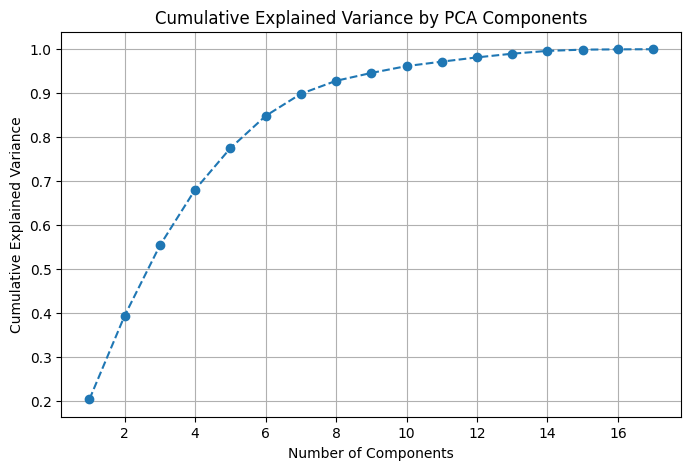

Number of components explaining 95% variance: 10
Shape of X_train after PCA: (1176, 10)
Shape of X_test after PCA: (294, 10)


In [8]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
numerical_features = ['Age', 'DistanceFromHome']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Feature and Target Variables
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PCA for Dimensionality Reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot cumulative explained variance to decide the number of components
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components explaining 95% variance
n_components = sum(cumulative_variance <= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Shape of X_train after PCA:", X_train_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)

## Feature Selection

Feature selection reduces the dimensionality of the dataset and focuses on the most predictive features. This step was performed using a Random Forest Classifier to evaluate the importance of features.
<br>
This step ensures that the subsequent models are both efficient and effective, enabling robust predictions with minimal noise

1. Random Forest Classifier: <br>
The feature importance scores indicate how much each feature contributes to the prediction of the target variable, Attrition.

2. Top Features: <br>
The top 10 most important features were identified based on the importance scores. <br>
A horizontal bar plot visualized these features, providing insights into their relative contributions to the model's decisions.

3. Feature Subsetting: <br>
The dataset was reduced to include only the top 10 features to improve model performance by eliminating noise but also speeds up training and reduces overfitting.

4. Key Insights:
Features such as JobRole, MonthlyIncome, and DistanceFromHome were found to be among the most predictive for employee attrition. These insights align with organizational factors influencing employee retention.

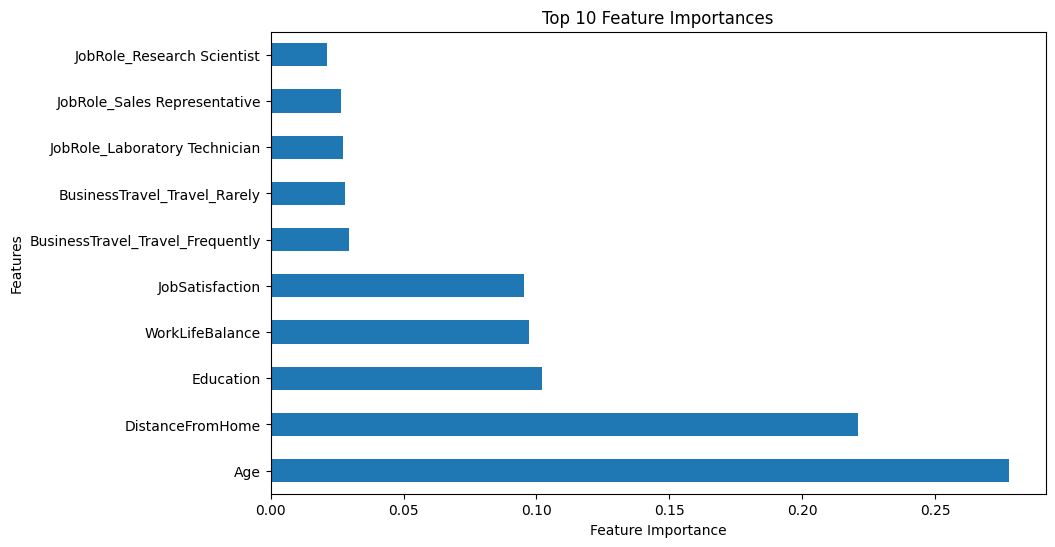



 Top 10 Selected Features: ['Age', 'DistanceFromHome', 'Education', 'WorkLifeBalance', 'JobSatisfaction', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'JobRole_Laboratory Technician', 'JobRole_Sales Representative', 'JobRole_Research Scientist']


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train Random Forest to determine feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Select top 10 features
top_features = feature_importances.nlargest(10).index.tolist()
print("\n\n Top 10 Selected Features:", top_features)

# Subset the training and test datasets based on the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


## Model Building

The model evaluation and further optimization are performed, ensuring that the selected models are both accurate and reliable.

We train and evaluate machine learning models to predict employee attrition. The focus is on two classification algorithms, Logistic Regression and Support Vector Machines (SVM), using selected features derived from earlier feature selection.

1. Selected Features

2. Cross-Validation: <br>
Both models were evaluated using 5-fold cross-validation to ensure robustness. The process repeats for all subsets, and the average score is computed.

3. Models: <br>
a. Logistic Regression: A linear model that provides an interpretable baseline for prediction. <br>
b. Support Vector Machines (SVM): A robust model for handling non-linear relationships.

4. Weight Calculation: <br>
For ensemble modeling, weights were calculated based on the cross-validation accuracies of the two models. These weights reflect the relative contribution of each model to the final ensemble.

5. Model Training

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensure selected features match the transformed dataset
selected_features = [feature for feature in top_features if feature in X_train.columns]
print("Final Selected Features:", selected_features)

# Cross-validate models using the correct feature set
print("Cross-validated accuracy scores for models:")

# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_cv_scores = cross_val_score(logistic_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Accuracy: {logistic_cv_scores.mean():.4f}")

# Support Vector Machine Model
svm_model = SVC(probability=True, random_state=42, kernel='rbf')
svm_cv_scores = cross_val_score(svm_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
print(f"SVM Accuracy: {svm_cv_scores.mean():.4f}")

# Combine model accuracies and compute weights
model_accuracies = {
    "Logistic Regression": logistic_cv_scores.mean(),
    "SVM": svm_cv_scores.mean()
}

# Calculate Normalized weights for the model
total_accuracy = sum(model_accuracies.values())
weights = {model: acc / total_accuracy for model, acc in model_accuracies.items()}
print("Model Weights:", weights)

# Training the selected features
logistic_model.fit(X_train[selected_features], y_train)
svm_model.fit(X_train[selected_features], y_train)


Final Selected Features: ['Age', 'DistanceFromHome', 'Education', 'WorkLifeBalance', 'JobSatisfaction', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'JobRole_Laboratory Technician', 'JobRole_Sales Representative', 'JobRole_Research Scientist']
Cross-validated accuracy scores for models:
Logistic Regression Accuracy: 0.8342
SVM Accuracy: 0.8316
Model Weights: {'Logistic Regression': np.float64(0.5007652658080969), 'SVM': np.float64(0.4992347341919032)}


SVC(probability=True, random_state=42)

## Combined Classification Model

To enhance prediction accuracy and reliability, we employed an ensemble approach by combining the outputs of Logistic Regression and Support Vector Machines (SVM). This weighted ensemble leverages the strengths of both models. <br>
This combined approach demonstrates how weighted ensembles can integrate the strengths of multiple models, delivering superior predictive power and interpretability. Let me know if you'd like further refinements!



Cross-validated accuracy scores for models:
Logistic Regression Accuracy: 0.8342
SVM Accuracy: 0.8316
Model Weights: {'Logistic Regression': np.float64(0.5007652658080969), 'SVM': np.float64(0.4992347341919032)}
Customized Model Evaluation:
Accuracy: 0.8673
Precision: 0.5000
Recall: 0.1538
F1-Score: 0.2353
ROC AUC: 0.7212


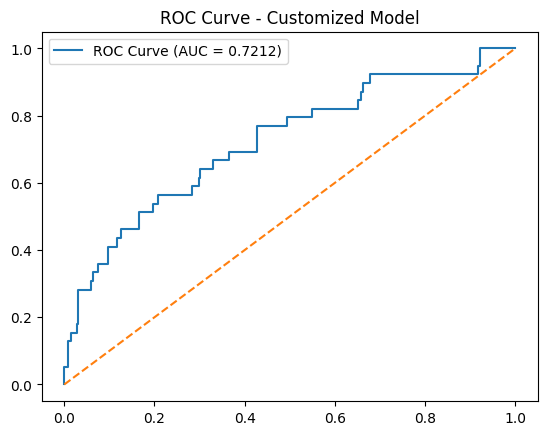

In [11]:
# Combined Classification Model
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Defining the models
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
svm_model = SVC(probability=True, random_state=42, kernel='rbf')
print("Cross-validated accuracy scores for models:")

# Cross Validation Scores
logistic_cv_scores = cross_val_score(logistic_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Accuracy: {logistic_cv_scores.mean():.4f}")

svm_cv_scores = cross_val_score(svm_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
print(f"SVM Accuracy: {svm_cv_scores.mean():.4f}")

# Model weights based on cross-validation accuracies
model_accuracies = {
    "Logistic Regression": logistic_cv_scores.mean(),
    "SVM": svm_cv_scores.mean()
}

total_accuracy = sum(model_accuracies.values())
weights = {model: acc / total_accuracy for model, acc in model_accuracies.items()}
print("Model Weights:", weights)

logistic_model.fit(X_train[selected_features], y_train)
svm_model.fit(X_train[selected_features], y_train)

# Generate Weighted Prediction
def weighted_predictions(models, weights, X_test):
    weighted_proba = np.zeros((X_test.shape[0],))
    for model_name, model in models.items():
        model_proba = model.predict_proba(X_test)[:, 1]  # Get probability for positive class
        weighted_proba += weights[model_name] * model_proba
    return weighted_proba

trained_models = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model
}

weighted_proba = weighted_predictions(trained_models, weights, X_test[selected_features])
final_predictions = (weighted_proba >= 0.3).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
print("Customized Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.4f}")
print(f"Precision: {precision_score(y_test, final_predictions):.4f}")
print(f"Recall: {recall_score(y_test, final_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, final_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, weighted_proba):.4f}")

fpr, tpr, _ = roc_curve(y_test, weighted_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, weighted_proba):.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve - Customized Model")
plt.legend()
plt.show()

## Model Evaluation

The evaluation process focuses on comparing individual models (Logistic Regression and SVM) and the combined ensemble model to assess their predictive performance.

1. Metrics: <br>
a. Accuracy: Measures overall correctness of the predictions. <br>
b. Precision: Evaluates the proportion of true positives among predicted positives. <br>
c. Recall: Identifies the proportion of actual positives correctly predicted.<br>
d. F1-Score: Provides a balance between precision and recall.<br>
e. ROC AUC: Assesses the model's ability to distinguish between classes.

2. Evaluation Procedure: <br>
Models were evaluated on the test dataset using the selected features. <br>
For Logistic Regression, a decision threshold of 0.3 was used to optimize recall and align with organizational goals. <br>
ROC and Precision-Recall curves were generated for a detailed understanding of performance across thresholds.

3. Combine Models: <br>
Weighted probabilities from Logistic Regression and SVM were aggregated using model weights derived from cross-validation accuracies.
The combined model balanced the strengths of both classifiers, enhancing predictive power.

4. Results Visualization: <br>
ROC curves highlighted the trade-off between sensitivity and specificity.
Precision-Recall curves provided additional insights into performance under imbalanced data scenarios.

Model: Logistic Regression
Accuracy: 0.857
Precision: 0.440
Recall: 0.282
F1-Score: 0.344
ROC AUC: 0.692




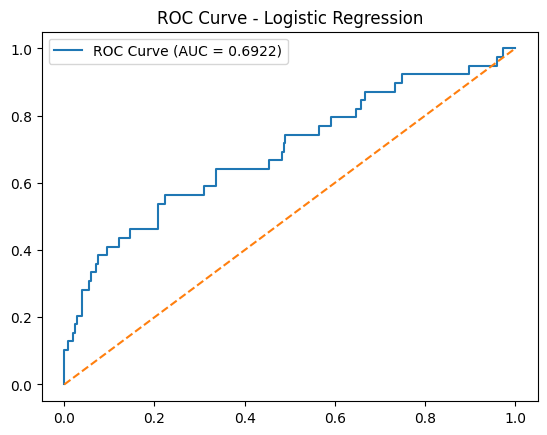

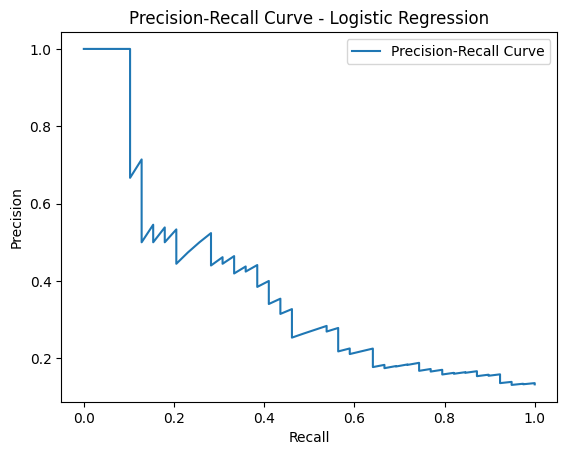

Model: SVM
Accuracy: 0.857
Precision: 0.385
Recall: 0.128
F1-Score: 0.192
ROC AUC: 0.682




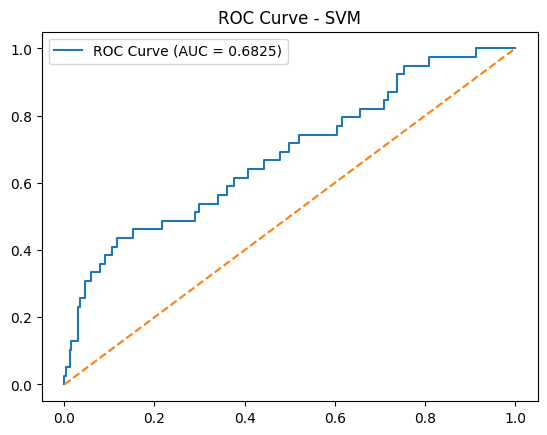

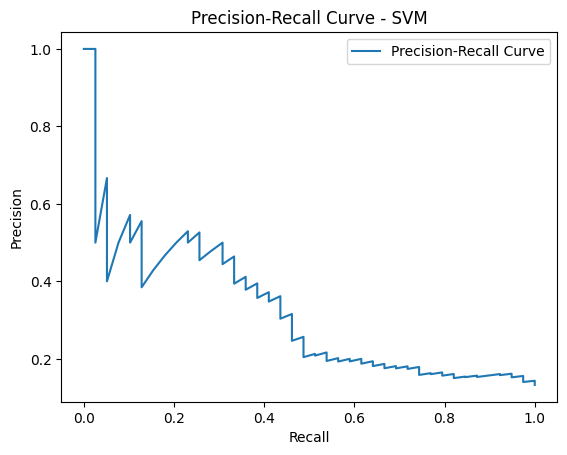



Combined Model Evaluation:
Accuracy: 0.871
Precision: 1.000
Recall: 0.026
F1-Score: 0.050
ROC AUC: 0.721


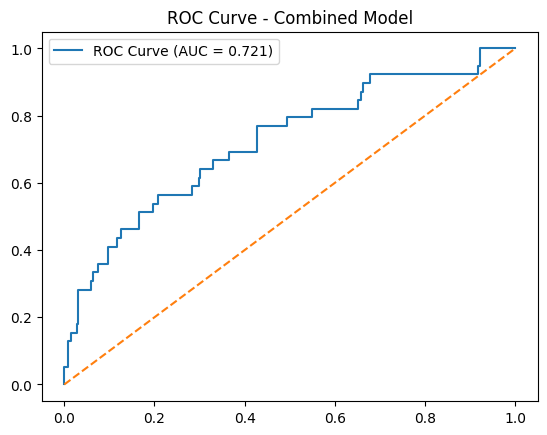

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Evaluate Individual Models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # if model_name == "Logistic Regression":
    y_pred = (y_pred_proba >= 0.3).astype(int)
    # else:
        # y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
    print("\n")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend()
    plt.show()

# Evaluate Models
evaluate_model(logistic_model, X_test[selected_features], y_test, "Logistic Regression")
evaluate_model(svm_model, X_test[selected_features], y_test, "SVM")

# Calculate weighted prediction
def weighted_predictions(models, weights, X_test):
    weighted_proba = np.zeros((X_test.shape[0],))
    for model_name, model in models.items():
        model_proba = model.predict_proba(X_test)[:, 1]
        weighted_proba += weights[model_name] * model_proba
    return weighted_proba

trained_models = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model
}

weighted_proba = weighted_predictions(trained_models, weights, X_test[selected_features])
final_predictions = (weighted_proba >= 0.5).astype(int)

print("\n\nCombined Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.3f}")
print(f"Precision: {precision_score(y_test, final_predictions):.3f}")
print(f"Recall: {recall_score(y_test, final_predictions):.3f}")
print(f"F1-Score: {f1_score(y_test, final_predictions):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, weighted_proba):.3f}")

# Plot ROC curve for the combined model
fpr, tpr, _ = roc_curve(y_test, weighted_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, weighted_proba):.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve - Combined Model")
plt.legend()
plt.show()


## Model Comparison: Accuracy and ROC AUC

For Comparison of the performance of the models, we've taken Accuracy and ROC and AUC.

This analysis ensures a comprehensive understanding of the models' capabilities, guiding the selection of the most effective approach for predicting employee attrition.

The Combined Model aggregates predictions from Logistic Regression and SVM, leveraging their strengths to deliver enhanced performance.

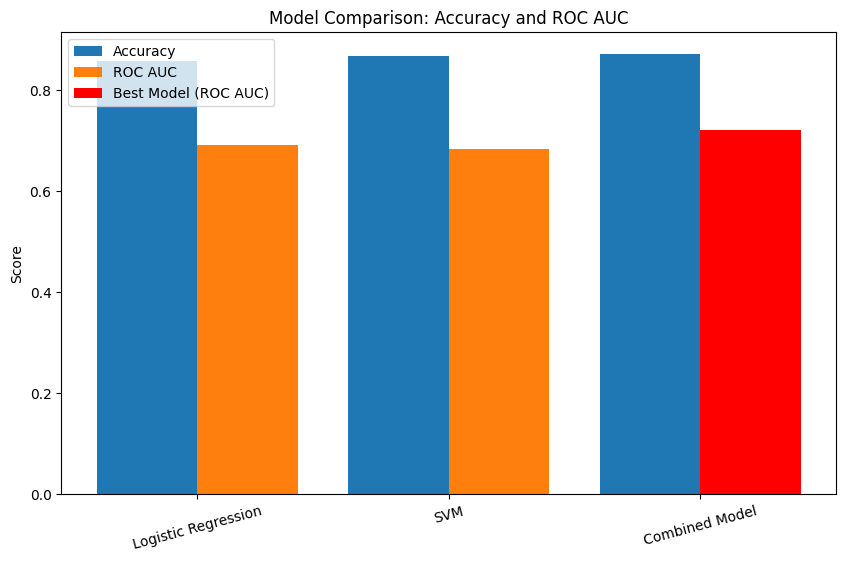

In [13]:
# Store Evaluation Metrics for each model
model_metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, (logistic_model.predict_proba(X_test[selected_features])[:, 1] >= 0.3).astype(int)),
        "ROC AUC": roc_auc_score(y_test, logistic_model.predict_proba(X_test[selected_features])[:, 1])
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, svm_model.predict(X_test[selected_features])),
        "ROC AUC": roc_auc_score(y_test, svm_model.predict_proba(X_test[selected_features])[:, 1])
    },
    "Combined Model": {
        "Accuracy": accuracy_score(y_test, final_predictions),
        "ROC AUC": roc_auc_score(y_test, weighted_proba)
    }
}

models = list(model_metrics.keys())
accuracy_scores = [model_metrics[model]["Accuracy"] for model in models]
roc_auc_scores = [model_metrics[model]["ROC AUC"] for model in models]

# Plot Accuracy and ROC AUC scores
plt.figure(figsize=(10, 6))
x_indices = np.arange(len(models))

plt.bar(x_indices - 0.2, accuracy_scores, width=0.4, label="Accuracy", align='center')
plt.bar(x_indices + 0.2, roc_auc_scores, width=0.4, label="ROC AUC", align='center')

best_model_index = np.argmax(roc_auc_scores)
plt.bar(x_indices[best_model_index] + 0.2, roc_auc_scores[best_model_index], width=0.4, color='red', label="Best Model (ROC AUC)", align='center')

plt.xticks(x_indices, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy and ROC AUC")
plt.legend(loc="upper left")
plt.show()

## Interpretability with LIME

The LIME explainer was used to provide insights into the predictions. It helps explain the model's decisions by identifying the most influential features for a given prediction.

Key Observations from the LIME Output:

1. Prediction Probabilities:
The model predicts a 36% probability of attrition for the selected instance, while there is a 64% probability of no attrition.
2. Top Features Influencing the Prediction: <br>
a. Age: The negative contribution of age (value: -0.98) implies that older employees in this case might be less likely to leave. <br>
b. Job Satisfaction: A satisfaction level of 1 contributes positively toward attrition, indicating dissatisfaction may increase the likelihood of leaving. <br>
c. Business Travel: Employees who frequently travel for business contribute slightly toward attrition but have minimal weight in this instance. <br>
d. JobRole: Specific roles such as "Sales Representative" and "Laboratory Technician" have been highlighted, suggesting potential trends in job roles influencing attrition rates.

The LIME analysis aligns with intuitive business insights—lower job satisfaction and frequent business travel can be associated with higher attrition risk.

Such detailed feature importance helps HR teams to focus interventions on critical factors such as improving job satisfaction or providing tailored support for certain job roles.

The visual bar chart in the LIME output shows how each feature contributes toward "Attrition" (orange) or "No Attrition" (blue)

In [14]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize Lime
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,  # Pass feature names
    class_names=['No Attrition', 'Attrition'],
    mode='classification'
)

# Explain an instance using proper feature names
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[0].values,  # Ensure this instance is still a NumPy array
    rf_model.predict_proba,
    num_features=5
)

# Display in the notebook
lime_exp.show_in_notebook()

# Save explanation to HTML
lime_exp.save_to_file('lime_explanation.html')


c:\Users\lakum\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Visualization: Confusion Matrix
A confusion matrix is used to evaluate the performance of the Logistic Regression model by comparing its predictions with the actual class labels. It provides a detailed breakdown of correct and incorrect predictions, which helps to assess the model's effectiveness in predicting employee attrition.

The model demonstrates strong performance in identifying employees who stay, reflected by the high number of true negatives (169). <br>
The low number of false negatives (15) ensures that most employees at risk of leaving are detected.
<br>
The model generates a significant number of false positives (86), potentially misclassifying employees as likely to leave, which may lead to unnecessary interventions.

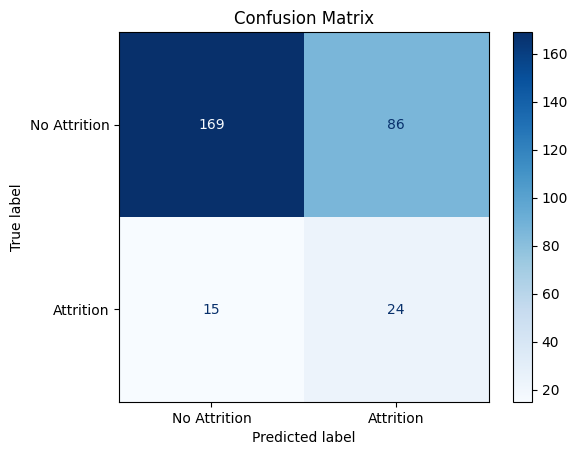

In [15]:
#for best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for Logistic Regression
logistic_predictions = (logistic_model.predict_proba(X_test[selected_features])[:, 1] >= 0.16).astype(int)
cm_logistic = confusion_matrix(y_test, logistic_predictions)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['No Attrition', 'Attrition'])

disp_logistic.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



## Other Metrics

Logistic Regression - MAE: 0.2238, MSE: 0.1044, RMSE: 0.1044, R²: 0.0927, ROC AUC: 0.6922
SVM - MAE: 0.2341, MSE: 0.1066, RMSE: 0.1066, R²: 0.0731, ROC AUC: 0.6825
Combined Model - MAE: 0.2289, MSE: 0.1040, RMSE: 0.1040, R²: 0.0961, ROC AUC: 0.7212


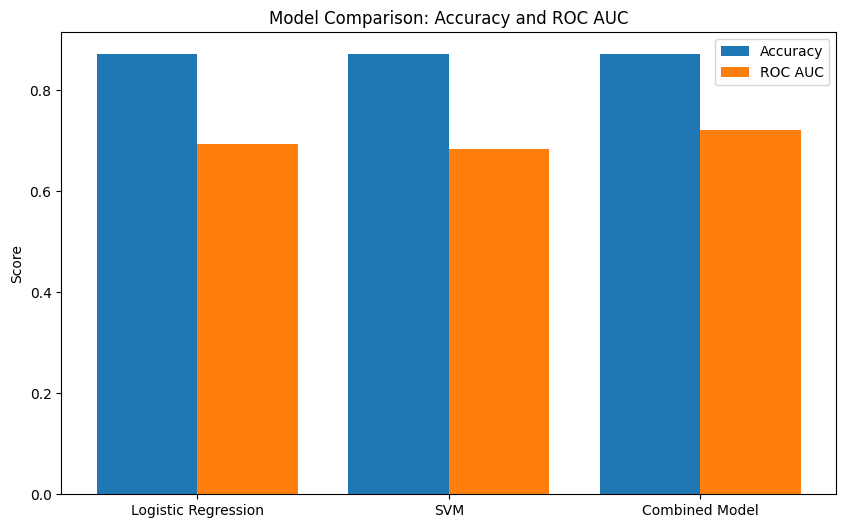

In [17]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_auc_score
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Metrics for Logistic Regression
y_proba_logistic = logistic_model.predict_proba(X_test[selected_features])[:, 1]
mae_logistic = mean_absolute_error(y_test, y_proba_logistic)
mse_logistic = mean_squared_error(y_test, y_proba_logistic)
rmse_logistic = mean_squared_error(y_test, y_proba_logistic)
r2_logistic = r2_score(y_test, y_proba_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)
print(f"Logistic Regression - MAE: {mae_logistic:.4f}, MSE: {mse_logistic:.4f}, RMSE: {rmse_logistic:.4f}, R²: {r2_logistic:.4f}, ROC AUC: {roc_auc_logistic:.4f}")

# Metrics for SVM
y_proba_svm = svm_model.predict_proba(X_test[selected_features])[:, 1]
mae_svm = mean_absolute_error(y_test, y_proba_svm)
mse_svm = mean_squared_error(y_test, y_proba_svm)
rmse_svm = mean_squared_error(y_test, y_proba_svm)
r2_svm = r2_score(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"SVM - MAE: {mae_svm:.4f}, MSE: {mse_svm:.4f}, RMSE: {rmse_svm:.4f}, R²: {r2_svm:.4f}, ROC AUC: {roc_auc_svm:.4f}")

# Metrics for Combined Model
mae_combined = mean_absolute_error(y_test, weighted_proba)
mse_combined = mean_squared_error(y_test, weighted_proba)
rmse_combined = mean_squared_error(y_test, weighted_proba)
r2_combined = r2_score(y_test, weighted_proba)
roc_auc_combined = roc_auc_score(y_test, weighted_proba)
print(f"Combined Model - MAE: {mae_combined:.4f}, MSE: {mse_combined:.4f}, RMSE: {rmse_combined:.4f}, R²: {r2_combined:.4f}, ROC AUC: {roc_auc_combined:.4f}")

# Visualizing Model Comparison
models = ["Logistic Regression", "SVM", "Combined Model"]
metrics = {
    "Accuracy": [
        accuracy_score(y_test, (y_proba_logistic >= 0.5).astype(int)),
        accuracy_score(y_test, (y_proba_svm >= 0.5).astype(int)),
        accuracy_score(y_test, (weighted_proba >= 0.5).astype(int))
    ],
    "ROC AUC": [roc_auc_logistic, roc_auc_svm, roc_auc_combined]
}

# Plotting Model Metrics
plt.figure(figsize=(10, 6))
x_indices = np.arange(len(models))
bar_width = 0.4

plt.bar(x_indices - bar_width / 2, metrics["Accuracy"], bar_width, label="Accuracy")
plt.bar(x_indices + bar_width / 2, metrics["ROC AUC"], bar_width, label="ROC AUC")

plt.xticks(x_indices, models)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy and ROC AUC")
plt.legend()
plt.show()


In [31]:
import numpy as np
import pandas as pd

# Define input features
input_features = {
    'Age': 35,
    'DistanceFromHome': 10,
    'JobSatisfaction': 3,
    'WorkLifeBalance': 3,
    'Education': 3,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'JobRole': 'Sales Executive',
#     'JobRole_Human Resources': 0,
#     'JobRole_Manager': 0,
#     'JobRole_Manufacturing Director': 0   
}

# Create DataFrame
input_df = pd.DataFrame([input_features])

# One-Hot Encode Categorical Variables
categorical_columns = ['BusinessTravel', 'Department', 'JobRole']
input_df_encoded = pd.get_dummies(input_df, columns=categorical_columns, drop_first=True)

# Add Missing Columns
for col in X_train.columns:
    if col not in input_df_encoded:
        input_df_encoded[col] = 0

# Align Column Order
input_df_encoded = input_df_encoded[X_train.columns]

# Standardize Numerical Features
numerical_features = ['Age', 'DistanceFromHome']
input_df_encoded[numerical_features] = scaler.transform(input_df_encoded[numerical_features])

# Predict Probabilities
probabilities = logistic_model.predict_proba(input_df_encoded)[:, 1]

# Adjust Threshold
threshold = 0.3  # Adjust this value based on recall/precision trade-off
likelihood_of_attrition = probabilities[0] * 100
print(f"The likelihood of attrition for the given employee is: {likelihood_of_attrition:.2f}%")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Department_Research & Development
- Department_Sales
- JobRole_Human Resources
- JobRole_Manager
- JobRole_Manufacturing Director
- ...
